<a href="https://colab.research.google.com/github/ram1014/colab_files/blob/main/tarea_taylor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea Polinomios de Taylor

Alumno: Ramon Humberto Delgado Andrade

Matrícula: 26316


##Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sympy import symbols, exp, diff, lambdify
from sympy.plotting import plot
import matplotlib.pyplot as plt


Mounted at /content/drive


##Carga de datos

In [3]:
df_data = pd.read_csv("/content/drive/MyDrive/ClassFiles/compra_producto.csv")
print(df_data)

    salario_en_miles  Probabilidad
0                  6        0.0000
1                  7        0.0000
2                  8        0.0600
3                  9        0.0200
4                 10        0.0000
5                 11        0.0400
6                 12        0.0600
7                 13        0.0600
8                 14        0.0399
9                 15        0.0003
10                16        0.0591
11                17        0.0025
12                18        0.0067
13                19        0.0020
14                20        0.0274
15                21        0.0992
16                22        0.2489
17                23        0.5000
18                24        0.6711
19                25        0.8608
20                26        0.9126
21                27        0.9820
22                28        0.9733
23                29        0.9775
24                30        0.9391


##1. Para los datos que se muestran en la tabla diga cuál cree que es el valor de x0

In [4]:
x0 = df_data.loc[df_data['Probabilidad'] == .5, 'salario_en_miles'].iloc[0]
print("El valor de x0 = ",x0)


El valor de x0 =  23


##2. Encuentre un polinomio de Taylor de orden 3 para la función logística alrededor de x 0

In [5]:
x = symbols('x')
f_x = 1/(1+exp(x0-x))


deriv_1 = diff(f_x, x)
deriv_2 = diff(f_x, x,2)
deriv_3 = diff(f_x, x,3)

print(f"Función Original: {f_x}")
print(f"Derivada de orden 1: {deriv_1}")
print(f"Derivada de orden 2: {deriv_2}")
print(f"Derivada de orden 3: {deriv_3}")

taylor_s = f_x + deriv_1*(x-x0)+(deriv_2/2)*((x-x0)**2)+(deriv_3/6)*((x-x0)**3)
print(f"Polinomio de Taylor: {taylor_s}")


Función Original: 1/(exp(23 - x) + 1)
Derivada de orden 1: exp(23 - x)/(exp(23 - x) + 1)**2
Derivada de orden 2: (-exp(23 - x) + 2*exp(46 - 2*x)/(exp(23 - x) + 1))/(exp(23 - x) + 1)**2
Derivada de orden 3: (exp(23 - x) - 6*exp(46 - 2*x)/(exp(23 - x) + 1) + 6*exp(69 - 3*x)/(exp(23 - x) + 1)**2)/(exp(23 - x) + 1)**2
Polinomio de Taylor: (x - 23)**3*(exp(23 - x) - 6*exp(46 - 2*x)/(exp(23 - x) + 1) + 6*exp(69 - 3*x)/(exp(23 - x) + 1)**2)/(6*(exp(23 - x) + 1)**2) + (x - 23)**2*(-exp(23 - x) + 2*exp(46 - 2*x)/(exp(23 - x) + 1))/(2*(exp(23 - x) + 1)**2) + (x - 23)*exp(23 - x)/(exp(23 - x) + 1)**2 + 1/(exp(23 - x) + 1)


##3. Evalúe el polinomio obtenido para cada uno de los salarios de la tabla

In [13]:
x_values = df_data['salario_en_miles'].to_numpy()
numerical_function = lambdify(x, taylor_s, "numpy")
taylor_result_array = numerical_function(x_values)
print("Salario en miles que se usara como valores de x:\n\n",x_values)
print("\n\nEvaluacion del polinomio de taylor usando los salarios:\n\n",taylor_result_array,"\n\n")

#Anexando resultados al dataframe original
df_data['taylor_pol_results'] =  taylor_result_array
print("Anexando resultados al dataframe original:\n\n",df_data,"\n\n")


Salario en miles que se usara como valores de x:

 [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30]


Evaluacion del polinomio de taylor usando los salarios:

 [-2.85793598e-05 -6.41074748e-05 -1.41938295e-04 -3.09603582e-04
 -6.63770036e-04 -1.39465923e-03 -2.86112470e-03 -5.70288309e-03
 -1.09708829e-02 -2.01755479e-02 -3.49508462e-02 -5.56290825e-02
 -7.75356838e-02 -8.48819709e-02 -5.22818631e-02  1.73385299e-02
  1.23645959e-01  5.00000000e-01  8.76354041e-01  9.82661470e-01
  1.05228186e+00  1.08488197e+00  1.07753568e+00  1.05562908e+00
  1.03495085e+00] 


Anexando resultados al dataframe original:

     salario_en_miles  Probabilidad  taylor_pol_resutls  error_aprox  \
0                  6        0.0000           -0.000029     0.000029   
1                  7        0.0000           -0.000064     0.000064   
2                  8        0.0600           -0.000142     0.060142   
3                  9        0.0200           -0.000310     0.020310   


##4. Encuentre el error de aproximación calculando el valor absoluto de la diferencia de los valores aproximados y los reales

In [14]:
df_data['error_aprox'] =  abs(df_data['Probabilidad'] - df_data['taylor_pol_results'])
print("Agregando error de aproximación al dataframe \n\n",df_data,"\n\n")


Agregando error de aproximación al dataframe 

     salario_en_miles  Probabilidad  taylor_pol_resutls  error_aprox  \
0                  6        0.0000           -0.000029     0.000029   
1                  7        0.0000           -0.000064     0.000064   
2                  8        0.0600           -0.000142     0.060142   
3                  9        0.0200           -0.000310     0.020310   
4                 10        0.0000           -0.000664     0.000664   
5                 11        0.0400           -0.001395     0.041395   
6                 12        0.0600           -0.002861     0.062861   
7                 13        0.0600           -0.005703     0.065703   
8                 14        0.0399           -0.010971     0.050871   
9                 15        0.0003           -0.020176     0.020476   
10                16        0.0591           -0.034951     0.094051   
11                17        0.0025           -0.055629     0.058129   
12                18        0

##5. Grafique los valores aproximados y los reales y analice el resultado

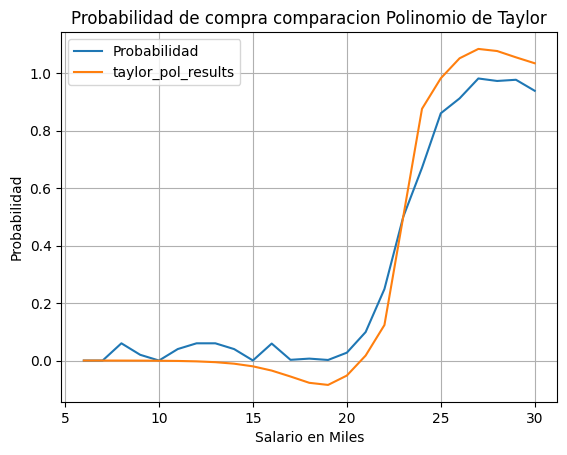

In [15]:
df_data.plot(kind='line', x='salario_en_miles', y=['Probabilidad','taylor_pol_results'])
plt.title('Probabilidad de compra comparacion Polinomio de Taylor')
plt.xlabel('Salario en Miles')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()
